In [93]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics
import seaborn as sns
from sklearn import linear_model 
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()
%matplotlib inline
from sklearn.metrics import mean_absolute_percentage_error as mape

In [94]:
df = pd.read_csv("Dina Food.csv")
#df=pd.read_csv("Dina Food.csv", )
raw=df.copy()
df['Time_stamp']=pd.to_datetime(df['Time_stamp'])
#df.set_index("Time_stamp", inplace=True)++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#df.drop(["Temperature"] , axis=1, inplace=True)
df.head(20)


,Time_stamp,Total_kwh
0,2021-08-01 00:00:00,47.71
1,2021-08-01 01:00:00,53.87
2,2021-08-01 02:00:00,50.19
3,2021-08-01 03:00:00,48.13
4,2021-08-01 04:00:00,44.67
5,2021-08-01 05:00:00,96.52
6,2021-08-01 06:00:00,114.04
7,2021-08-01 07:00:00,138.26
8,2021-08-01 08:00:00,135.52
9,2021-08-01 09:00:00,122.12


In [95]:
def features(df):
    df=df.copy()
    df['dayofweek']=df['Time_stamp'].dt.day_of_week
    df['weekofyear']=df['Time_stamp'].dt.isocalendar().week
    df['hour']=df['Time_stamp'].dt.hour
    df['quarter']=df['Time_stamp'].dt.quarter
    df['month']=df['Time_stamp'].dt.month
    df['year']=df['Time_stamp'].dt.year
    df['dayofyear']=df['Time_stamp'].dt.dayofyear
    df['dayofmonth']=df['Time_stamp'].dt.day
    df['kwh_previous_day'] = df['Total_kwh'].shift(24)
    df['2_days_before'] = df['Total_kwh'].shift(48)
    df['3_days_before'] = df['Total_kwh'].shift(72)
    df['4_days_before'] = df['Total_kwh'].shift(96)
    df['5_days_before'] = df['Total_kwh'].shift(120)
    df['6_days_before'] = df['Total_kwh'].shift(144)
    df['1_week_before'] = df['Total_kwh'].shift(168)
    return df

In [96]:
data_df=features(df)
data_df.head()

,Time_stamp,Total_kwh,dayofweek,weekofyear,hour,quarter,month,year,dayofyear,dayofmonth,kwh_previous_day,2_days_before,3_days_before,4_days_before,5_days_before,6_days_before,1_week_before
0,2021-08-01 00:00:00,47.71,6,30,0,3,8,2021,213,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-01 01:00:00,53.87,6,30,1,3,8,2021,213,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-01 02:00:00,50.19,6,30,2,3,8,2021,213,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-01 03:00:00,48.13,6,30,3,3,8,2021,213,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-01 04:00:00,44.67,6,30,4,3,8,2021,213,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
data_df.tail()

,Time_stamp,Total_kwh,dayofweek,weekofyear,hour,quarter,month,year,dayofyear,dayofmonth,kwh_previous_day,2_days_before,3_days_before,4_days_before,5_days_before,6_days_before,1_week_before
8010,2022-06-30 19:00:00,161.28,3,26,19,2,6,2022,181,30,132.14,178.17,161.10,151.57,73.27,187.47,180.48
8011,2022-06-30 20:00:00,158.89,3,26,20,2,6,2022,181,30,122.50,161.34,154.19,152.98,68.26,191.43,167.64
8012,2022-06-30 21:00:00,156.40,3,26,21,2,6,2022,181,30,133.01,148.45,150.01,149.27,67.17,191.96,162.45
8013,2022-06-30 22:00:00,148.42,3,26,22,2,6,2022,181,30,137.52,135.60,153.41,142.67,64.22,173.37,160.27
8014,2022-06-30 23:00:00,139.36,3,26,23,2,6,2022,181,30,137.31,140.32,153.12,152.39,70.61,163.23,162.77


In [98]:
data_df.head()

,Time_stamp,Total_kwh,dayofweek,weekofyear,hour,quarter,month,year,dayofyear,dayofmonth,kwh_previous_day,2_days_before,3_days_before,4_days_before,5_days_before,6_days_before,1_week_before
0,2021-08-01 00:00:00,47.71,6,30,0,3,8,2021,213,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-01 01:00:00,53.87,6,30,1,3,8,2021,213,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-01 02:00:00,50.19,6,30,2,3,8,2021,213,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-01 03:00:00,48.13,6,30,3,3,8,2021,213,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-01 04:00:00,44.67,6,30,4,3,8,2021,213,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
data_df=data_df.dropna()

In [100]:
# Check data types in columns
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7847 entries, 168 to 8014
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time_stamp        7847 non-null   datetime64[ns]
 1   Total_kwh         7847 non-null   float64       
 2   dayofweek         7847 non-null   int64         
 3   weekofyear        7847 non-null   UInt32        
 4   hour              7847 non-null   int64         
 5   quarter           7847 non-null   int64         
 6   month             7847 non-null   int64         
 7   year              7847 non-null   int64         
 8   dayofyear         7847 non-null   int64         
 9   dayofmonth        7847 non-null   int64         
 10  kwh_previous_day  7847 non-null   float64       
 11  2_days_before     7847 non-null   float64       
 12  3_days_before     7847 non-null   float64       
 13  4_days_before     7847 non-null   float64       
 14  5_days_before     7847

In [101]:
# Get descriptive statistics summary of data set 
data_df.describe()

,Total_kwh,dayofweek,weekofyear,hour,quarter,month,year,dayofyear,dayofmonth,kwh_previous_day,2_days_before,3_days_before,4_days_before,5_days_before,6_days_before,1_week_before
count,7847.000000,7847.000000,7847.000000,7847.000000,7847.000000,7847.000000,7847.000000,7847.000000,7847.000000,7847.000000,7847.000000,7847.000000,7847.000000,7847.000000,7847.000000,7847.000000
mean,132.107902,2.990442,26.252581,11.501466,2.452785,6.449981,2021.553460,180.978463,15.943545,131.817233,131.792702,131.710442,131.683613,131.756910,131.861975,131.602860
std,44.909983,2.002238,15.807887,6.921851,1.166611,3.632811,0.497166,111.087523,8.700632,44.899561,44.874158,44.807245,44.812849,44.823608,44.829711,44.744586
min,30.040000,0.000000,1.000000,0.000000,1.000000,1.000000,2021.000000,1.000000,1.000000,30.040000,30.040000,30.040000,30.040000,30.040000,30.040000,30.040000
25%,104.105000,1.000000,12.000000,6.000000,1.000000,3.000000,2021.000000,82.000000,9.000000,103.940000,103.940000,103.940000,103.940000,103.980000,104.055000,103.975000
50%,127.550000,3.000000,24.000000,12.000000,2.000000,6.000000,2022.000000,164.000000,16.000000,127.250000,127.230000,127.150000,127.110000,127.110000,127.180000,126.960000
75%,164.535000,5.000000,41.000000,17.500000,4.000000,10.000000,2022.000000,284.000000,23.000000,164.165000,164.160000,164.080000,164.015000,164.160000,164.375000,164.015000
max,591.960000,6.000000,52.000000,23.000000,4.000000,12.000000,2022.000000,365.000000,31.000000,591.960000,591.960000,591.960000,591.960000,591.960000,591.960000,591.960000


In [102]:
# Display features in data set
data_df.columns

Index(['Time_stamp', 'Total_kwh', 'dayofweek', 'weekofyear', 'hour', 'quarter',
       'month', 'year', 'dayofyear', 'dayofmonth', 'kwh_previous_day',
       '2_days_before', '3_days_before', '4_days_before', '5_days_before',
       '6_days_before', '1_week_before'],
      dtype='object')

In [103]:
#Operational Data Frame
data_df.shape

(7847, 17)

In [104]:
#Original DataFrame
df.shape

(8015, 2)

In [105]:
# Check for missing values in the columns
data_df.isna().values.any()

False

In [106]:
data_df = data_df.set_index(['Time_stamp'])

In [107]:
data_df.head()

,Total_kwh,dayofweek,weekofyear,hour,quarter,month,year,dayofyear,dayofmonth,kwh_previous_day,2_days_before,3_days_before,4_days_before,5_days_before,6_days_before,1_week_before
Time_stamp,,,,,,,,,,,,,,,,
2021-08-08 00:00:00,44.47,6,31,0,3,8,2021,220,8,125.39,125.40,122.98,112.67,117.79,114.48,47.71
2021-08-08 01:00:00,52.36,6,31,1,3,8,2021,220,8,123.86,131.19,118.30,125.66,119.09,112.77,53.87
2021-08-08 02:00:00,47.00,6,31,2,3,8,2021,220,8,121.64,124.35,135.56,124.57,128.52,115.85,50.19
2021-08-08 03:00:00,45.72,6,31,3,3,8,2021,220,8,162.31,108.97,128.53,116.39,124.67,122.62,48.13
2021-08-08 04:00:00,40.59,6,31,4,3,8,2021,220,8,103.29,108.48,121.78,114.40,101.66,136.68,44.67


In [108]:
heat_df=data_df.copy()
Day_data=heat_df[['Total_kwh']]
Day_data=Day_data['2021-08-08 00:00:00':'2021-08-08 23:00:00']
heat_df=heat_df.resample('D').sum()
heat_df=heat_df[['Total_kwh']]
heat_df= heat_df.loc['05-01-2022':'05-30-2022']
heat_df=heat_df.reset_index()

In [109]:
heat_df.head()

,Time_stamp,Total_kwh
0,2022-05-01,1218.95
1,2022-05-02,2835.81
2,2022-05-03,4134.28
3,2022-05-04,4086.21
4,2022-05-05,4037.71


In [110]:
pivot_table = pd.pivot_table(Day_data, values='Total_kwh', index='Time_stamp', columns=None)


<AxesSubplot:ylabel='Time_stamp'>

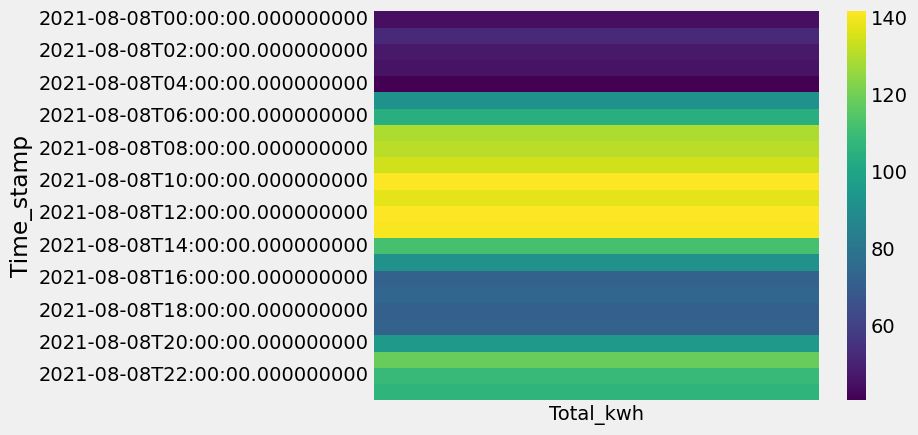

In [111]:
sns.heatmap(Day_data, cmap='viridis')

In [112]:
daily_data = heat_df.groupby(pd.Grouper(key='Time_stamp', freq='D')).mean()

<AxesSubplot:ylabel='Time_stamp'>

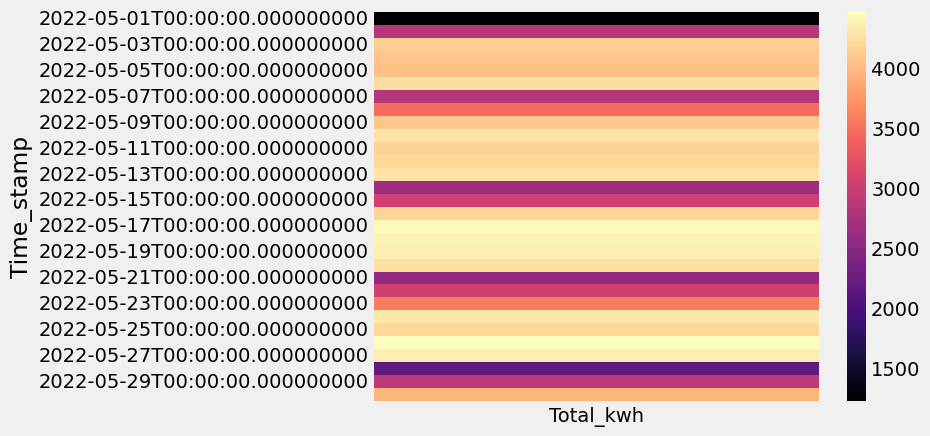

In [113]:
sns.heatmap(daily_data, cmap='magma')

# Train-Test Split

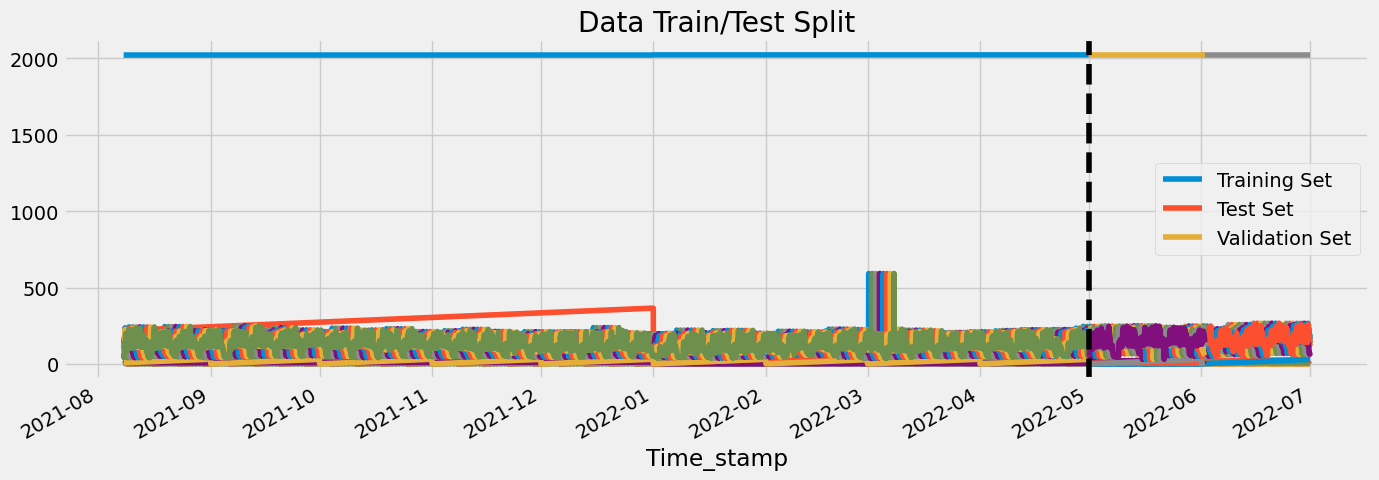

In [114]:
train = data_df.loc[data_df.index < '05-01-2022']
val = data_df.loc['05-01-2022':'06-01-2022']
test= data_df.loc[data_df.index >= '06-01-2022']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
val.plot(ax=ax, label='Validation set')
ax.axvline('05-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set','Validation Set'])
plt.show()

In [115]:
train = data_df.loc[data_df.index < '05-01-2022']
test= data_df.loc[data_df.index >= '05-01-2022']

In [116]:
# Split data into train and test set: 80% / 20%
#train, test = train_test_split(data_df, test_size=0.20)

In [117]:
train=train.reset_index()
test=test.reset_index()

In [118]:
train

,Time_stamp,Total_kwh,dayofweek,weekofyear,hour,quarter,month,year,dayofyear,dayofmonth,kwh_previous_day,2_days_before,3_days_before,4_days_before,5_days_before,6_days_before,1_week_before
0,2021-08-08 00:00:00,44.47,6,31,0,3,8,2021,220,8,125.39,125.40,122.98,112.67,117.79,114.48,47.71
1,2021-08-08 01:00:00,52.36,6,31,1,3,8,2021,220,8,123.86,131.19,118.30,125.66,119.09,112.77,53.87
2,2021-08-08 02:00:00,47.00,6,31,2,3,8,2021,220,8,121.64,124.35,135.56,124.57,128.52,115.85,50.19
3,2021-08-08 03:00:00,45.72,6,31,3,3,8,2021,220,8,162.31,108.97,128.53,116.39,124.67,122.62,48.13
4,2021-08-08 04:00:00,40.59,6,31,4,3,8,2021,220,8,103.29,108.48,121.78,114.40,101.66,136.68,44.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378,2022-04-30 19:00:00,59.97,5,17,19,2,4,2022,120,30,176.98,164.99,143.06,136.81,136.59,98.90,61.46
6379,2022-04-30 20:00:00,56.30,5,17,20,2,4,2022,120,30,163.11,152.05,127.23,128.48,137.15,95.19,56.10
6380,2022-04-30 21:00:00,54.43,5,17,21,2,4,2022,120,30,158.09,152.93,132.46,134.79,132.29,113.76,56.02
6381,2022-04-30 22:00:00,49.35,5,17,22,2,4,2022,120,30,137.13,144.66,130.75,127.24,127.40,120.50,55.44


In [119]:
test

,Time_stamp,Total_kwh,dayofweek,weekofyear,hour,quarter,month,year,dayofyear,dayofmonth,kwh_previous_day,2_days_before,3_days_before,4_days_before,5_days_before,6_days_before,1_week_before
0,2022-05-01 00:00:00,52.42,6,17,0,2,5,2022,121,1,126.80,117.60,120.48,116.71,116.17,108.43,54.95
1,2022-05-01 01:00:00,51.70,6,17,1,2,5,2022,121,1,124.54,117.25,122.66,123.57,121.34,103.02,54.44
2,2022-05-01 02:00:00,48.52,6,17,2,2,5,2022,121,1,120.45,127.90,119.99,133.22,114.78,112.22,52.53
3,2022-05-01 03:00:00,51.50,6,17,3,2,5,2022,121,1,116.31,117.24,111.48,130.32,112.20,111.04,57.42
4,2022-05-01 04:00:00,50.92,6,17,4,2,5,2022,121,1,116.29,111.77,104.57,135.72,115.08,104.02,54.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2022-06-30 19:00:00,161.28,3,26,19,2,6,2022,181,30,132.14,178.17,161.10,151.57,73.27,187.47,180.48
1460,2022-06-30 20:00:00,158.89,3,26,20,2,6,2022,181,30,122.50,161.34,154.19,152.98,68.26,191.43,167.64
1461,2022-06-30 21:00:00,156.40,3,26,21,2,6,2022,181,30,133.01,148.45,150.01,149.27,67.17,191.96,162.45
1462,2022-06-30 22:00:00,148.42,3,26,22,2,6,2022,181,30,137.52,135.60,153.41,142.67,64.22,173.37,160.27


# ==================Machine Learning Algorithm====================

# Linear Regression

In [120]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [121]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1,1)
y_train = train['Total_kwh']

In [122]:
X_train

array([[   0],
       [   1],
       [   2],
       ...,
       [6380],
       [6381],
       [6382]], dtype=int64)

In [123]:
y_train

0       44.47
1       52.36
2       47.00
3       45.72
4       40.59
        ...  
6378    59.97
6379    56.30
6380    54.43
6381    49.35
6382    54.33
Name: Total_kwh, Length: 6383, dtype: float64

In [124]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [125]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  -0.002110509745490194
Intercept:  132.57061027794694


C:\Users\shant\AppData\Local\Temp\ipykernel_20924\4094384673.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


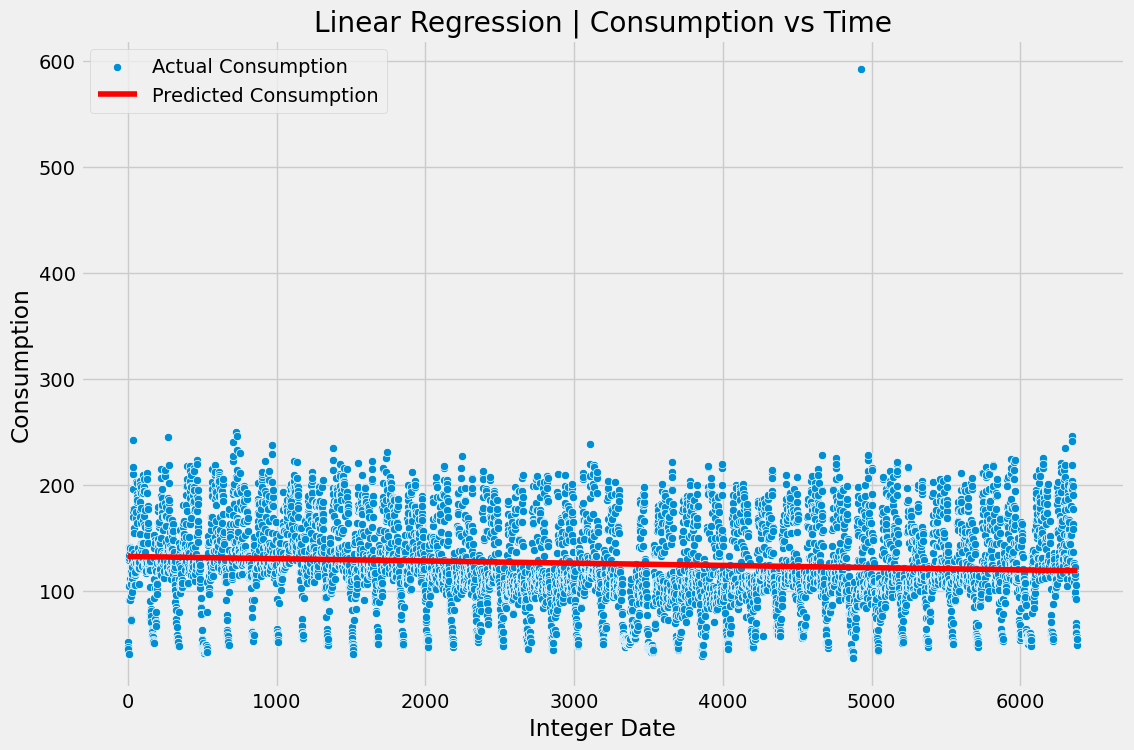

In [126]:
# Train set graph
plt.figure(1, figsize=(12,8))
plt.title('Linear Regression | Consumption vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Consumption')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Consumption')
plt.xlabel('Integer Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

In [127]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Total_kwh']

In [128]:
# Generate array with predicted values
y_pred = model.predict(X_test)

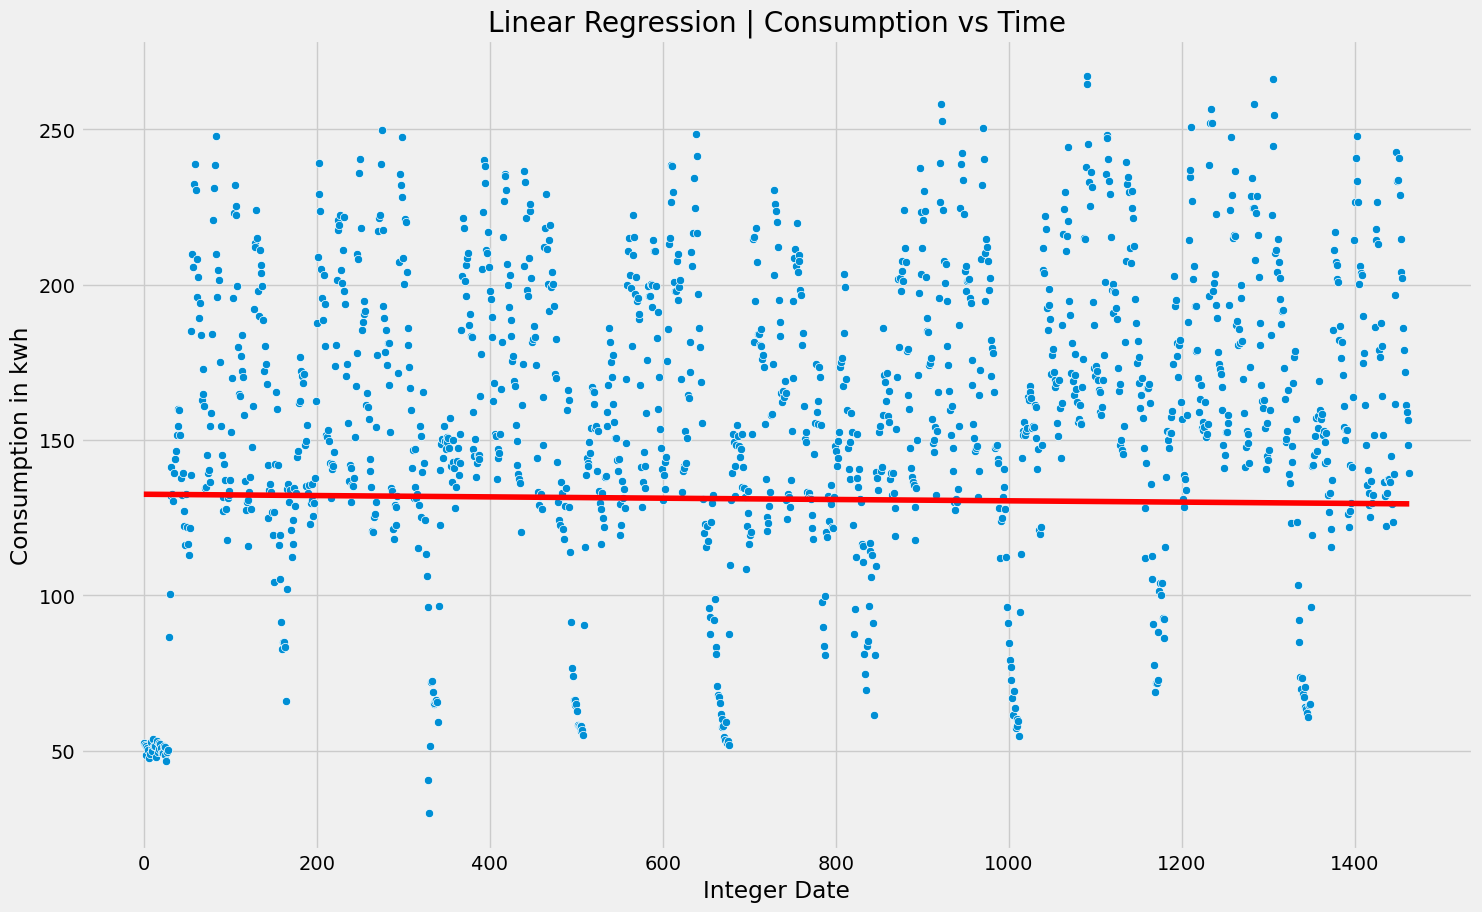

In [129]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Consumption vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Consumption')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Consumption')

plt.xlabel('Integer Date')
plt.ylabel('Consumption in kwh')

plt.show()

C:\Users\shant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


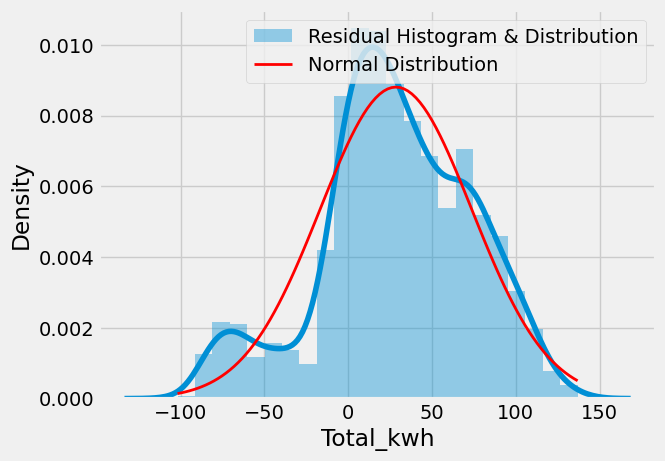

In [130]:
# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [131]:
results=test.copy()

In [132]:

results=results[['Time_stamp','Total_kwh']]

In [133]:
results['LR_Prediction']=model.predict(X_test)

Text(0.5, 1.0, 'Prediction Range of\xa0Linear Regressor')

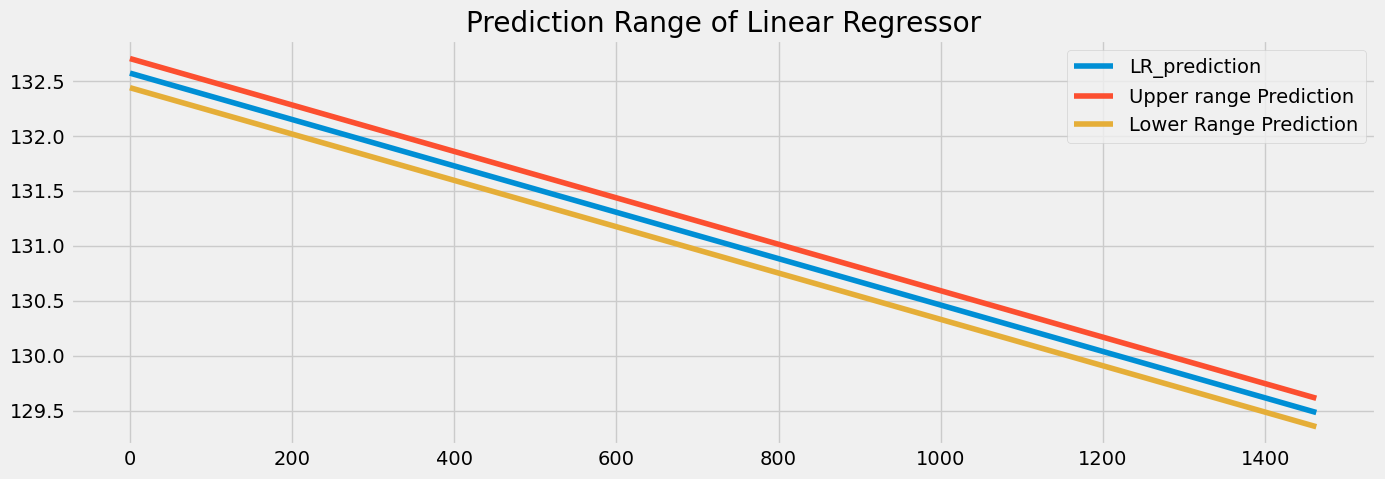

In [134]:
ax=results[["LR_Prediction"]].plot(figsize=(15,5))
results[["LR_Prediction"]].mul(100.10/100).plot(ax=ax,legend='Upper Range',figsize=(15,5))
results[["LR_Prediction"]].mul(99.90/100).plot(ax=ax,legend='Lower Range', figsize=(15,5))
plt.legend(["LR_prediction", "Upper range Prediction", "Lower Range Prediction"])
ax.set_title('Prediction Range of Linear Regressor')

In [135]:
results.head()

,Time_stamp,Total_kwh,LR_Prediction
0,2022-05-01 00:00:00,52.42,132.570610
1,2022-05-01 01:00:00,51.70,132.568500
2,2022-05-01 02:00:00,48.52,132.566389
3,2022-05-01 03:00:00,51.50,132.564279
4,2022-05-01 04:00:00,50.92,132.562168


In [136]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Erooe- MAPE: ', mape(results['Total_kwh'],results["LR_Prediction"])) 
#mape(results['Total_kwh'],results["LR_Prediction"])

Mean Absolute Error: 43.00820005284479
Mean Squared Error: 2860.902349562083
Root Mean Squared Error: 53.48740365321618
Mean Absolute Percentage Erooe- MAPE:  0.2941099919889228


# Decsion Tree Algorithm

In [137]:
#Decsion tree regression
from sklearn.tree import DecisionTreeRegressor
dec=DecisionTreeRegressor()
dec.fit(X_train,y_train)

DecisionTreeRegressor()

In [138]:
y_pred3=dec.predict(X_test)

In [139]:
results['DT_Prediction']=dec.predict(X_test)

In [140]:
results.head()

,Time_stamp,Total_kwh,LR_Prediction,DT_Prediction
0,2022-05-01 00:00:00,52.42,132.570610,44.47
1,2022-05-01 01:00:00,51.70,132.568500,52.36
2,2022-05-01 02:00:00,48.52,132.566389,47.00
3,2022-05-01 03:00:00,51.50,132.564279,45.72
4,2022-05-01 04:00:00,50.92,132.562168,40.59


In [141]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print('Mean Absolute Percentage Erooe- MAPE: ', mape(results['Total_kwh'],results["DT_Prediction"])) 

Mean Absolute Error: 27.87485655737705
Mean Squared Error: 1262.833486407104
Root Mean Squared Error: 35.536368503367136
Mean Absolute Percentage Erooe- MAPE:  0.18690789393043294


# Random Forest Regressor

In [142]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=100)
reg.fit(X_train,y_train)
y_pred4=reg.predict(X_test)

In [143]:
y_pred4=reg.predict(X_test)

In [144]:
results['RF_Prediction']=reg.predict(X_test)

In [145]:
results.head()

,Time_stamp,Total_kwh,LR_Prediction,DT_Prediction,RF_Prediction
0,2022-05-01 00:00:00,52.42,132.570610,44.47,46.7067
1,2022-05-01 01:00:00,51.70,132.568500,52.36,49.7049
2,2022-05-01 02:00:00,48.52,132.566389,47.00,48.0562
3,2022-05-01 03:00:00,51.50,132.564279,45.72,45.7287
4,2022-05-01 04:00:00,50.92,132.562168,40.59,45.0116


In [146]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
print('Mean Absolute Percentage Erooe- MAPE: ', mape(results['Total_kwh'],results["RF_Prediction"])) 

Mean Absolute Error: 27.46045546448087
Mean Squared Error: 1218.4026707891528
Root Mean Squared Error: 34.905625202668304
Mean Absolute Percentage Erooe- MAPE:  0.18355154489919281


# KNN Regressor

In [147]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=6)

In [148]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [149]:
y_pred5 = knn.predict(X_test)

In [150]:
'''accuracy_rate=[]
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_t=knn.predict(X_test)
    score=mape(test['Total_kwh'],y_pred_t)
    accuracy_rate.append(score)
print(accuracy_rate)'''

"accuracy_rate=[]\nfor i in range(1,40):\n    knn = KNeighborsRegressor(n_neighbors=i)\n    knn.fit(X_train,y_train)\n    y_pred_t=knn.predict(X_test)\n    score=mape(test['Total_kwh'],y_pred_t)\n    accuracy_rate.append(score)\nprint(accuracy_rate)"

Text(0, 0.5, 'Mape')

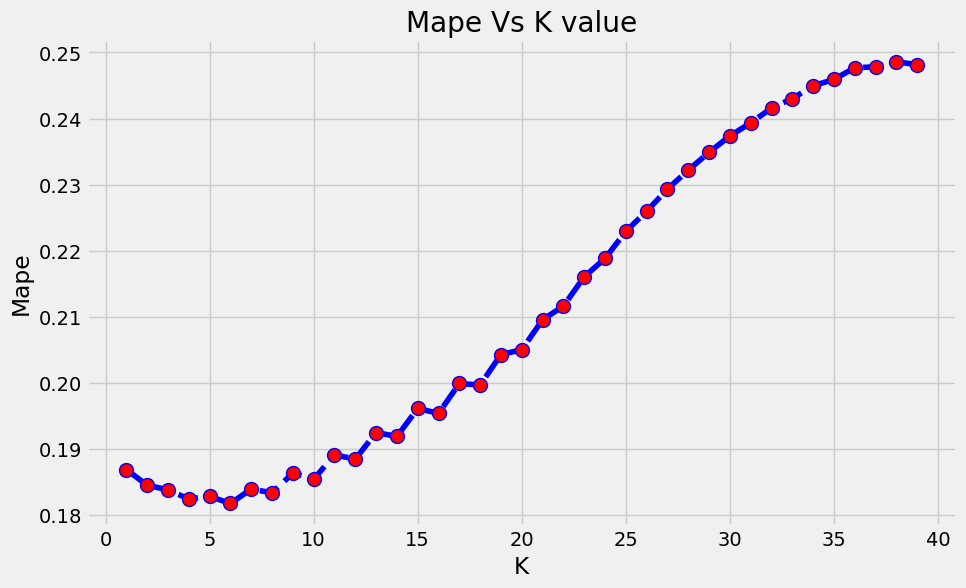

In [151]:
Mape_val=[0.18690789393043294, 0.1845285287035294, 0.18383065831259016, 0.18244234618912275, 0.18284990218489958, 0.1817664530740821, 0.1839501624846852, 0.18338198383853707, 0.18636717038123554, 0.1854332527740313, 0.189124782200743, 0.1884770225567772, 0.19250652677734412, 0.19190918807805069, 0.19614078457467682, 0.19540579080908158, 0.1999257108414976, 0.19969202927328705, 0.20430466930565883, 0.20503073472535221, 0.20957361919561507, 0.21162783786148467, 0.21607279834308757, 0.21884058425753045, 0.22295152240442467, 0.2259828852981149, 0.22933693441251252, 0.23220446003341344, 0.23489716505942715, 0.23737811440968115, 0.23935268426786888, 0.24159063152013793, 0.24302339816378735, 0.24496597592721026, 0.24592775325703073, 0.24769949231574062, 0.24781990532674408, 0.24860881935876436, 0.2481341104303102]
plt.figure(figsize=(10,6))
plt.plot(range(1,40),Mape_val, color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Mape Vs K value')
plt.xlabel('K')
plt.ylabel('Mape')

In [152]:
results['KNN_Prediction']=knn.predict(X_test)

Text(0.5, 1.0, 'Prediction Range of\xa0KNN\xa0Regressor')

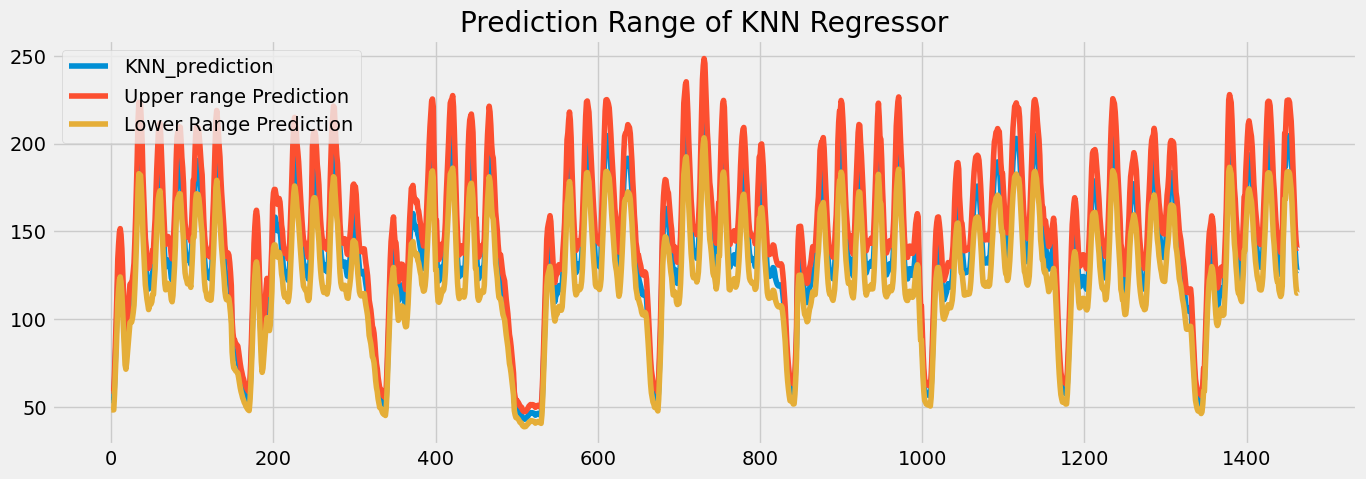

In [153]:
ax=results[["KNN_Prediction"]].plot(figsize=(15,5))
results[["KNN_Prediction"]].mul(11/10).plot(ax=ax,legend='Upper Range',figsize=(15,5))
results[["KNN_Prediction"]].mul(9/10).plot(ax=ax,legend='Lower Range', figsize=(15,5))
plt.legend(["KNN_prediction", "Upper range Prediction", "Lower Range Prediction"])
ax.set_title('Prediction Range of KNN Regressor')

In [154]:
results.head()

,Time_stamp,Total_kwh,LR_Prediction,DT_Prediction,RF_Prediction,KNN_Prediction
0,2022-05-01 00:00:00,52.42,132.570610,44.47,46.7067,53.615
1,2022-05-01 01:00:00,51.70,132.568500,52.36,49.7049,53.615
2,2022-05-01 02:00:00,48.52,132.566389,47.00,48.0562,53.615
3,2022-05-01 03:00:00,51.50,132.564279,45.72,45.7287,53.615
4,2022-05-01 04:00:00,50.92,132.562168,40.59,45.0116,63.595


In [155]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred5))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred5))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))
print('Mean Absolute Percentage Erooe- MAPE: ', mape(results['Total_kwh'],results["KNN_Prediction"]))

Mean Absolute Error: 27.40357695810565
Mean Squared Error: 1193.1966552899212
Root Mean Squared Error: 34.54267875092957
Mean Absolute Percentage Erooe- MAPE:  0.1817664530740821


# XgBoost

In [156]:
df = pd.read_csv('Dina Food.csv')
df = df.set_index('Time_stamp')
df.index = pd.to_datetime(df.index)

In [157]:
df.head()

,Total_kwh
Time_stamp,
2021-08-01 00:00:00,47.71
2021-08-01 01:00:00,53.87
2021-08-01 02:00:00,50.19
2021-08-01 03:00:00,48.13
2021-08-01 04:00:00,44.67


In [158]:
len(df)

8015

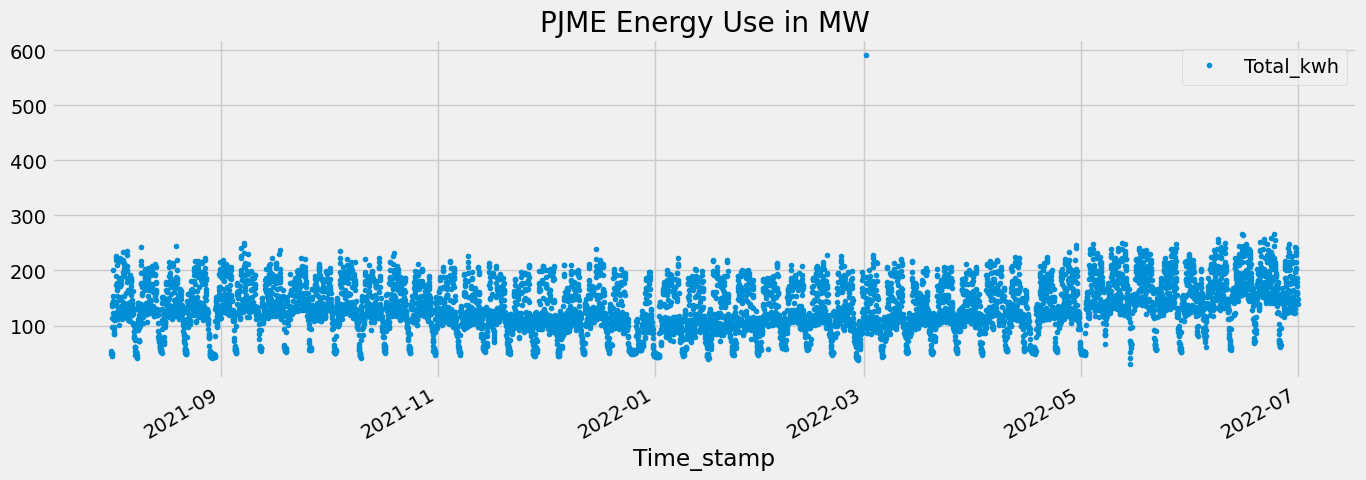

In [159]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()

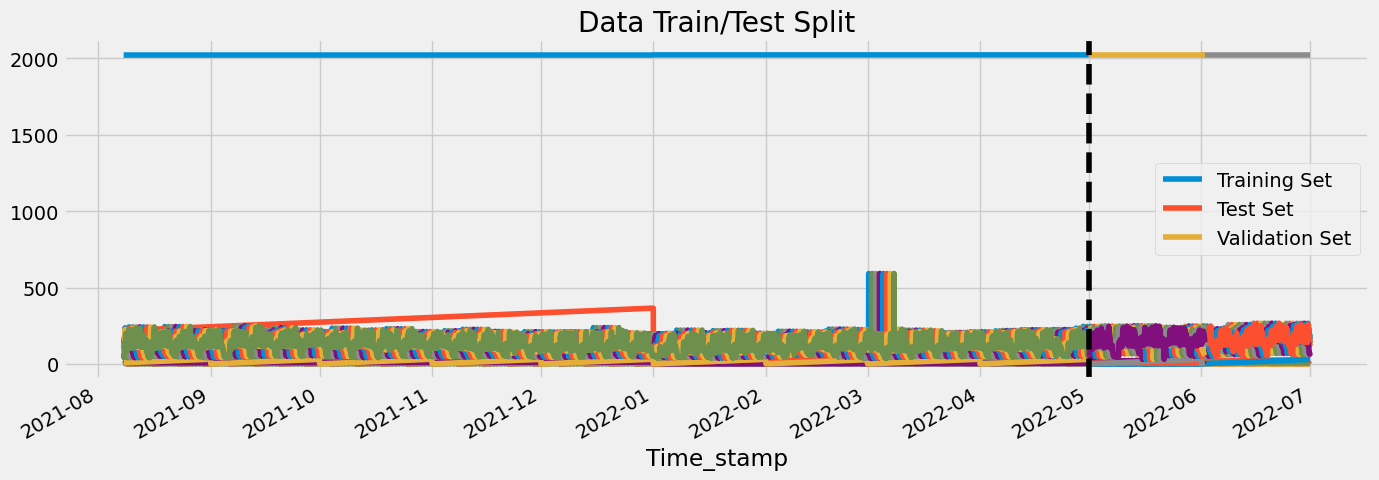

In [160]:
train = data_df.loc[data_df.index < '05-01-2022']
val = data_df.loc['05-01-2022':'06-01-2022']
test= data_df.loc[data_df.index >= '06-01-2022']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
val.plot(ax=ax, label='Validation set')
ax.axvline('05-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set','Validation Set'])
plt.show()

In [161]:
train = data_df.loc[data_df.index < '05-01-2022']
test= data_df.loc[data_df.index >= '05-01-2022']

In [162]:
#Create time series features based on time series index.
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    df['kwh_previous_day'] = df['Total_kwh'].shift(24)
    df['2_days_before'] = df['Total_kwh'].shift(48)
    df['3_days_before'] = df['Total_kwh'].shift(72)
    df['4_days_before'] = df['Total_kwh'].shift(96)
    df['5_days_before'] = df['Total_kwh'].shift(120)
    df['6_days_before'] = df['Total_kwh'].shift(144)
    df['1_week_before'] = df['Total_kwh'].shift(168)
    return df
df = create_features(df)

In [163]:
df.head()

,Total_kwh,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,kwh_previous_day,2_days_before,3_days_before,4_days_before,5_days_before,6_days_before,1_week_before
Time_stamp,,,,,,,,,,,,,,,,
2021-08-01 00:00:00,47.71,0,6,3,8,2021,213,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-01 01:00:00,53.87,1,6,3,8,2021,213,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-01 02:00:00,50.19,2,6,3,8,2021,213,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-01 03:00:00,48.13,3,6,3,8,2021,213,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-01 04:00:00,44.67,4,6,3,8,2021,213,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
df=df.dropna()

In [165]:
df.head()

,Total_kwh,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,kwh_previous_day,2_days_before,3_days_before,4_days_before,5_days_before,6_days_before,1_week_before
Time_stamp,,,,,,,,,,,,,,,,
2021-08-08 00:00:00,44.47,0,6,3,8,2021,220,8,31,125.39,125.40,122.98,112.67,117.79,114.48,47.71
2021-08-08 01:00:00,52.36,1,6,3,8,2021,220,8,31,123.86,131.19,118.30,125.66,119.09,112.77,53.87
2021-08-08 02:00:00,47.00,2,6,3,8,2021,220,8,31,121.64,124.35,135.56,124.57,128.52,115.85,50.19
2021-08-08 03:00:00,45.72,3,6,3,8,2021,220,8,31,162.31,108.97,128.53,116.39,124.67,122.62,48.13
2021-08-08 04:00:00,40.59,4,6,3,8,2021,220,8,31,103.29,108.48,121.78,114.40,101.66,136.68,44.67


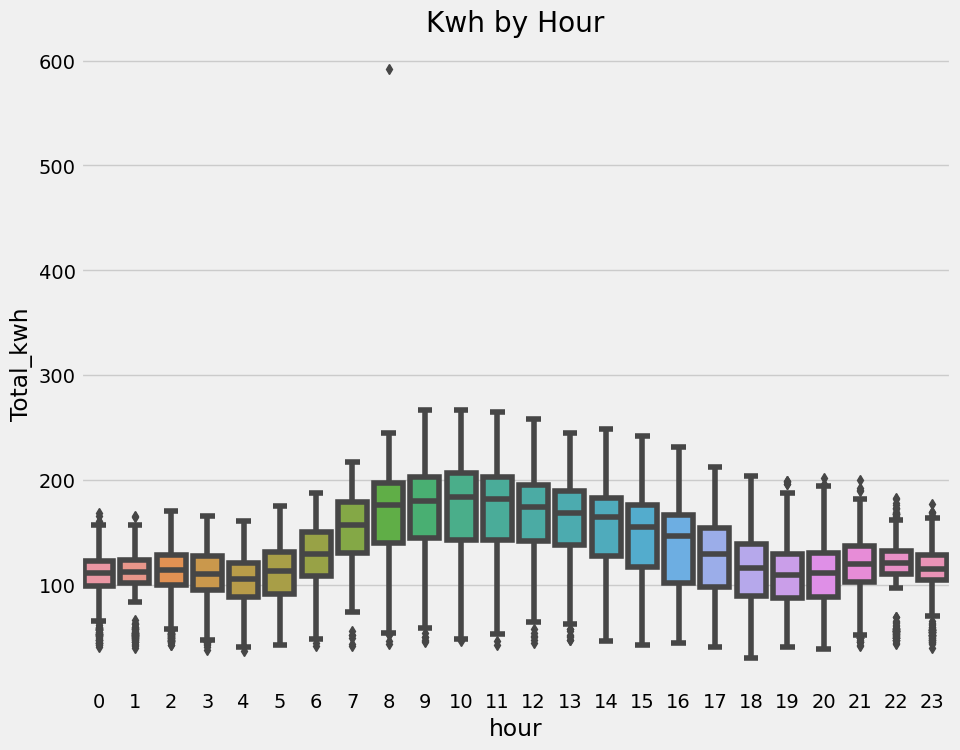

In [166]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='Total_kwh')
ax.set_title('Kwh by Hour')
plt.show()

In [167]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year','kwh_previous_day','2_days_before','3_days_before','4_days_before','5_days_before','6_days_before','1_week_before']
TARGET = 'Total_kwh'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [168]:
regxg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
regxg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[01:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:131.04393	validation_1-rmse:163.76939
[100]	validation_0-rmse:51.93136	validation_1-rmse:72.06968
[200]	validation_0-rmse:26.13378	validation_1-rmse:40.71363
[300]	validation_0-rmse:19.28139	validation_1-rmse:30.73074
[400]	validation_0-rmse:17.56641	validation_1-rmse:27.55860
[500]	validation_0-rmse:16.70201	validation_1-rmse:26.53329
[600]	validation_0-rmse:16.19952	validation_1-rmse:26.03895
[700]	validation_0-rmse:15.73478	validation_1-rmse:25.79765
[800]	validation_0-rmse:15.33769	validation_1-rmse:25.67590
[900]	validation_0-rmse:15.01307	validation_1-rmse:25.53737
[952]	validation_0-rmse:14.83401	validation_1-rmse:25.54221


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

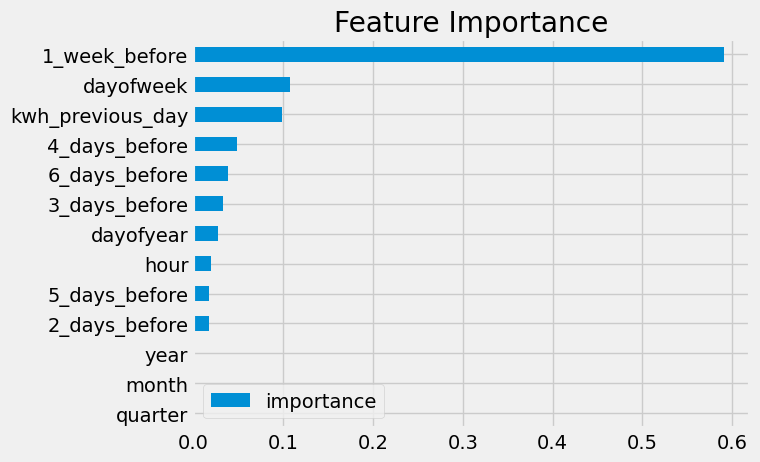

In [169]:
fi = pd.DataFrame(data=regxg.feature_importances_,
             index=regxg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

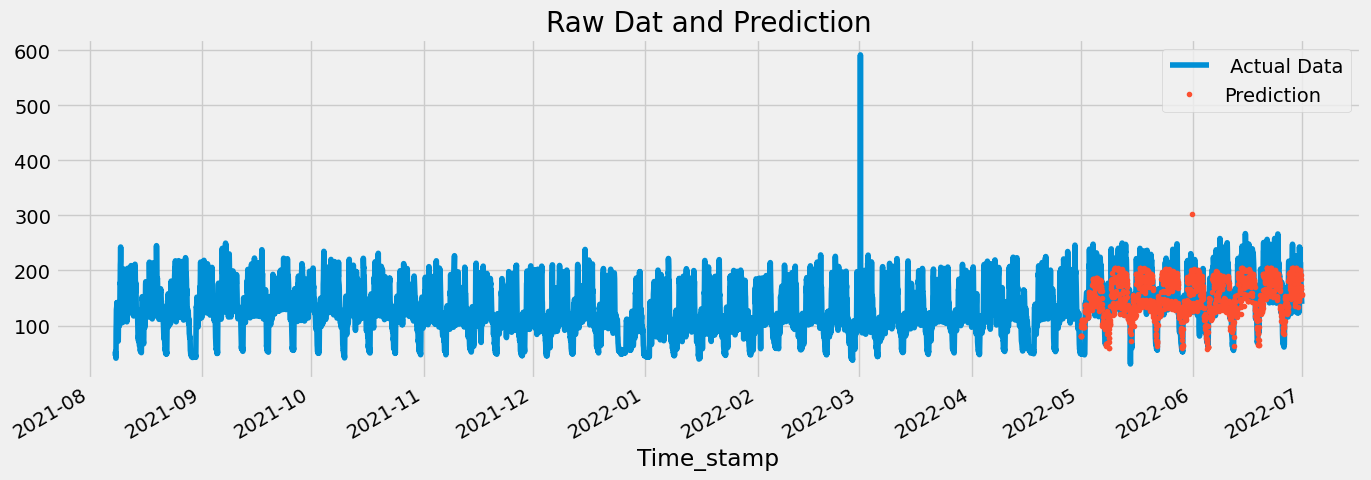

In [170]:
test['prediction'] = regxg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Total_kwh']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend([' Actual Data', 'Prediction'])
ax.set_title('Raw Dat and Prediction')
plt.show()

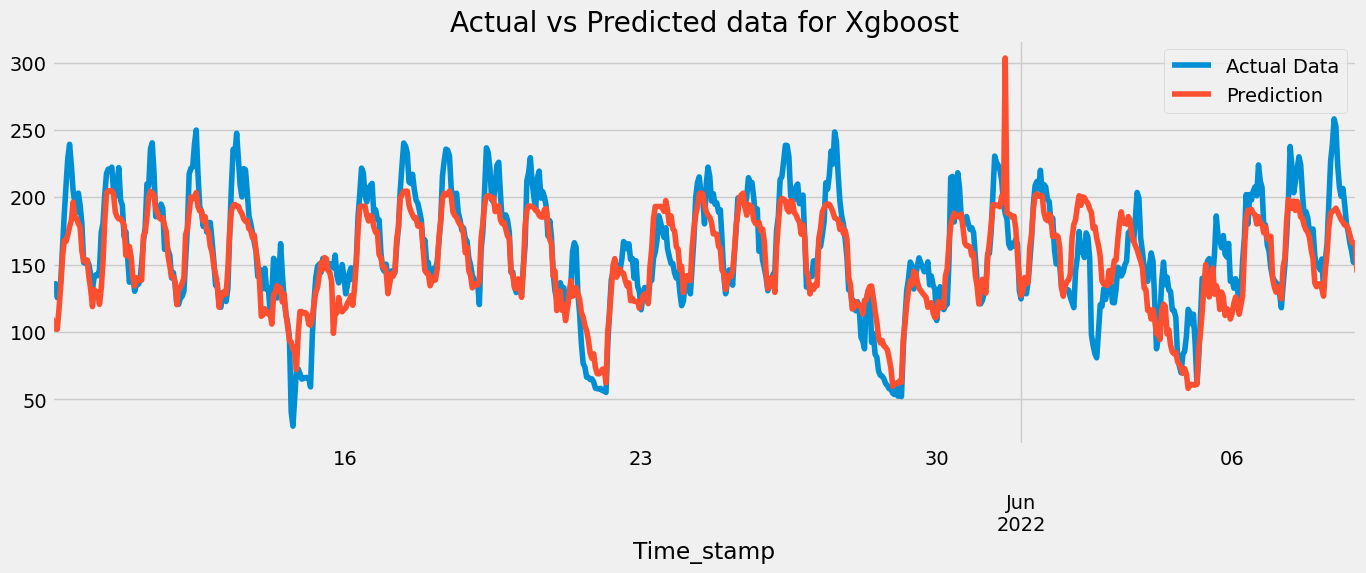

In [171]:
ax = df.loc[(df.index > '05-09-2022') & (df.index < '06-09-2022')]['Total_kwh'] \
    .plot(figsize=(15, 5), title='Actual vs Predicted data for Xgboost')
df.loc[(df.index > '05-09-2022') & (df.index < '06-09-2022')]['prediction'] \
    .plot(style='-')
plt.legend(['Actual Data','Prediction'])
plt.show()

In [172]:
results['Xgb_Prediction']=regxg.predict(X_test)

In [173]:
y_pred6=regxg.predict(X_test)

Text(0.5, 1.0, 'Prediction Range\xa0Of\xa0Xgboost')

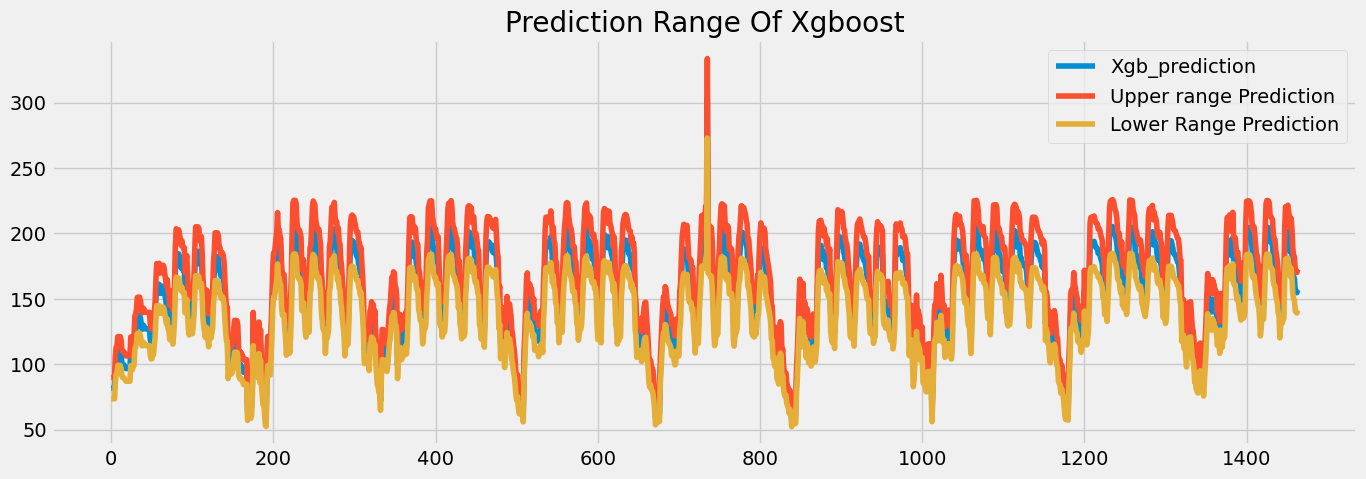

In [174]:
ax=results[["Xgb_Prediction"]].plot(figsize=(15,5))
results[["Xgb_Prediction"]].mul(11/10).plot(ax=ax,style='-',figsize=(15,5))
results[["Xgb_Prediction"]].mul(9/10).plot(ax=ax,style='-', figsize=(15,5))
plt.legend(["Xgb_prediction", "Upper range Prediction", "Lower Range Prediction"])
ax.set_title('Prediction Range Of Xgboost')

In [175]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred6))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred6))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))
print('Mean Absolute Percentage Erooe- MAPE: ', mape(results['Total_kwh'],results["Xgb_Prediction"]).round(1))

Mean Absolute Error: 19.544275250773612
Mean Squared Error: 651.8324703438318
Root Mean Squared Error: 25.531009975005528
Mean Absolute Percentage Erooe- MAPE:  0.1


# Result and Error Analysis

In [176]:
results=results.reset_index().resample("D", on='Time_stamp').sum()

In [177]:
results['XGB_accuracy'] = results.apply(lambda x: round((1-abs(x['Total_kwh']-x['Xgb_Prediction'])/x['Total_kwh'])*100,2),axis=1)

In [178]:
results['KNN_accuracy'] = results.apply(lambda x: round((1-abs(x['Total_kwh']-x['KNN_Prediction'])/x['Total_kwh'])*100,2),axis=1)

In [179]:
results['RF_accuracy'] = results.apply(lambda x: round((1-abs(x['Total_kwh']-x['RF_Prediction'])/x['Total_kwh'])*100,2),axis=1)

In [180]:
results['DT_accuracy'] = results.apply(lambda x: round((1-abs(x['Total_kwh']-x['DT_Prediction'])/x['Total_kwh'])*100,2),axis=1)

In [181]:
results['LR_accuracy'] = results.apply(lambda x: round((1-abs(x['Total_kwh']-x['LR_Prediction'])/x['Total_kwh'])*100,2),axis=1)

In [182]:
results['XGB_absolute_Error'] = results.apply(lambda x: round(abs(x['Total_kwh']-x['Xgb_Prediction']),2),axis=1)

In [183]:
results['KNN_absolute_Error'] = results.apply(lambda x: round(abs(x['Total_kwh']-x['KNN_Prediction']),2),axis=1)

In [184]:
results['RF_absolute_Error'] = results.apply(lambda x: round(abs(x['Total_kwh']-x['RF_Prediction']),2),axis=1)

In [185]:
results['DT_absolute_Error'] = results.apply(lambda x: round(abs(x['Total_kwh']-x['DT_Prediction']),2),axis=1)

In [186]:
results['LR_absolute_Error'] = results.apply(lambda x: round(abs(x['Total_kwh']-x['LR_Prediction']),2),axis=1)

In [187]:
results.head()

,index,Total_kwh,LR_Prediction,DT_Prediction,RF_Prediction,KNN_Prediction,Xgb_Prediction,XGB_accuracy,KNN_accuracy,RF_accuracy,DT_accuracy,LR_accuracy,XGB_absolute_Error,KNN_absolute_Error,RF_absolute_Error,DT_absolute_Error,LR_absolute_Error
Time_stamp,,,,,,,,,,,,,,,,,
2022-05-01,276,1218.95,3181.112146,2303.16,2286.9564,2293.538333,2339.134277,8.10,11.84,12.38,11.05,-60.97,1120.18,1074.59,1068.01,1084.21,1962.16
2022-05-02,852,2835.81,3179.896492,3570.39,3558.2072,3554.820000,3017.362793,93.60,74.65,74.53,74.10,87.87,181.55,719.01,722.40,734.58,344.09
2022-05-03,1428,4134.28,3178.680839,3574.96,3570.2337,3576.770000,3452.369873,83.51,86.51,86.36,86.47,76.89,681.91,557.51,564.05,559.32,955.60
2022-05-04,2004,4086.21,3177.465185,3704.82,3694.8580,3700.071667,3872.125000,94.76,90.55,90.42,90.67,77.76,214.09,386.14,391.35,381.39,908.74
2022-05-05,2580,4037.71,3176.249532,3726.49,3714.1914,3765.360000,3781.203613,93.65,93.25,91.99,92.29,78.66,256.51,272.35,323.52,311.22,861.46


In [188]:
l=len(results)

In [189]:
#Linear Regression Acurracy
Acuracy_LR=((results['LR_accuracy'].sum(axis=0))/l).round(2)

In [190]:
Acuracy_LR

76.1

In [191]:
#Decsion Tree Regression Acurracy
Acuracy_DT=((results['DT_accuracy'].sum(axis=0))/l).round(2)
Acuracy_DT

83.02

In [192]:
#Random Forest Regression Acurracy
Acuracy_RF=((results['RF_accuracy'].sum(axis=0))/l).round(2)
Acuracy_RF

83.03

In [193]:
#KNN Regression Acurracy
Acuracy_KNN=((results['KNN_accuracy'].sum(axis=0))/l).round(2)
Acuracy_KNN

83.04

In [194]:
#XGBoost Regression Acurracy
Acuracy_Xgb=((results['XGB_accuracy'].sum(axis=0))/l).round(2)
Acuracy_Xgb

90.73

Text(0.5, 1.0, 'Accuracy Comparision of Different\xa0Algorithms')

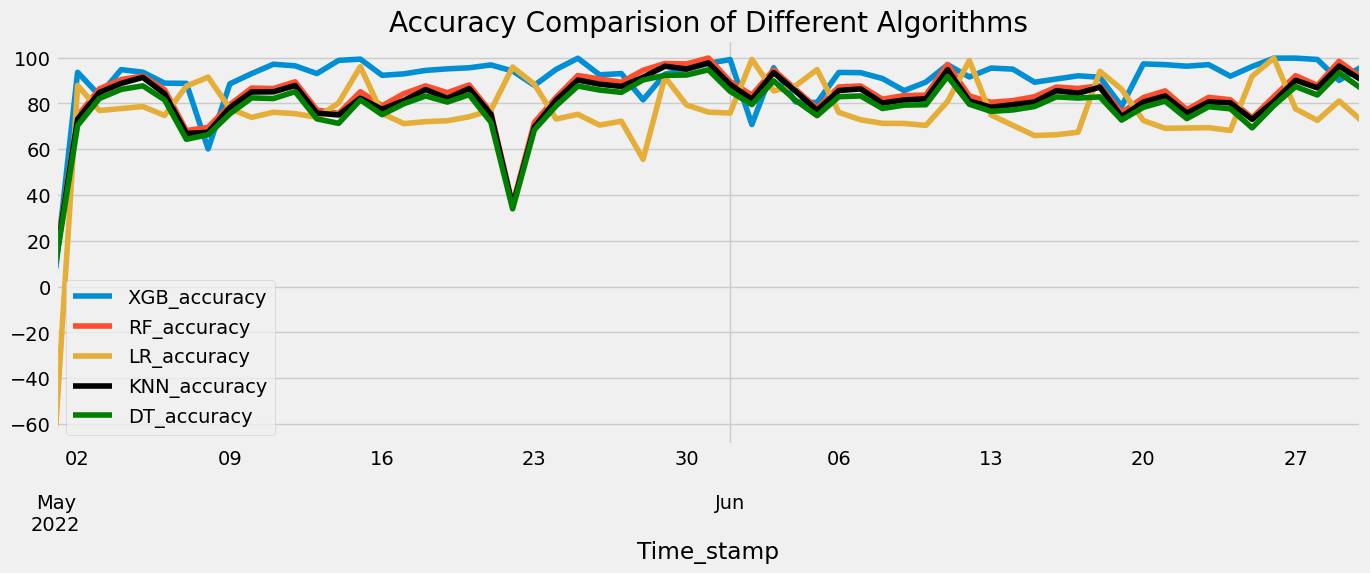

In [195]:
ax = results[['XGB_accuracy', 'RF_accuracy','LR_accuracy']].plot(figsize=(15, 5))
results[["KNN_accuracy"]].mul(0.98).plot(ax=ax,color='black', figsize=(15,5))
results[["DT_accuracy"]].mul(0.95).plot(ax=ax,color='green', figsize=(15,5))
ax.set_title('Accuracy Comparision of Different Algorithms')

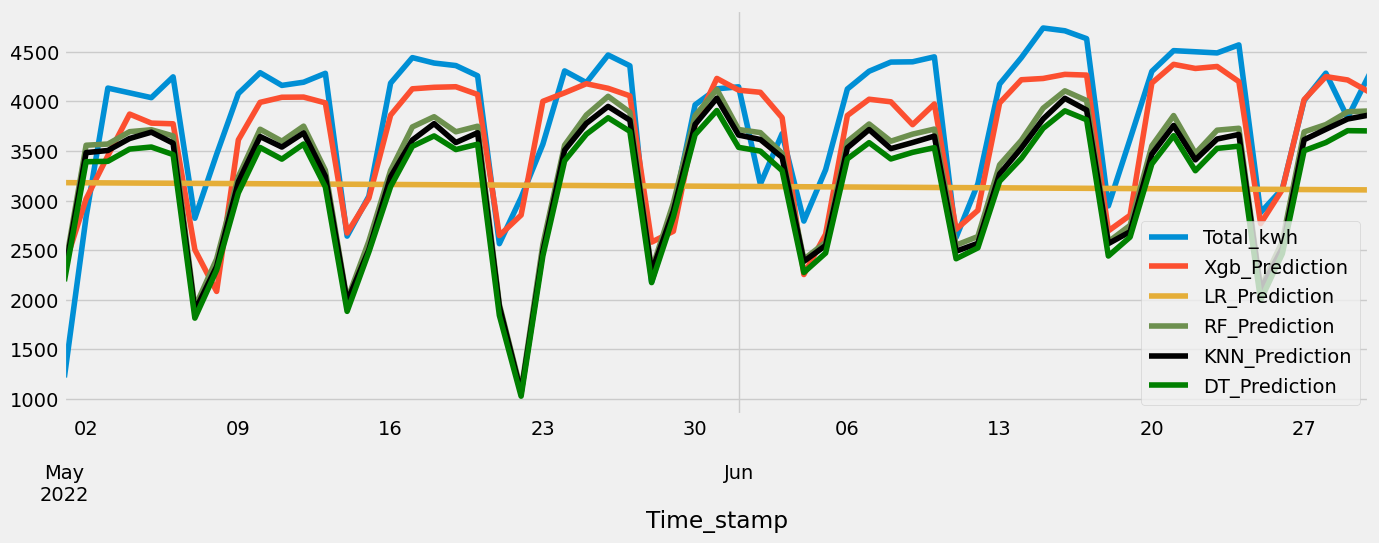

In [196]:
fig, ax = plt.subplots(figsize=(15, 5))
results[["Total_kwh"]].plot(ax=ax, label='Test Set')
results[['Xgb_Prediction','LR_Prediction','RF_Prediction']].plot(ax=ax, style='-')
results[["KNN_Prediction"]].mul(0.98).plot(ax=ax,color='black', figsize=(15,5))
results[["DT_Prediction"]].mul(0.95).plot(ax=ax,color='green', figsize=(15,5))
plt.show()

Text(0.5, 1.0, 'Absolute Error Comparision of Different\xa0Algorithms')

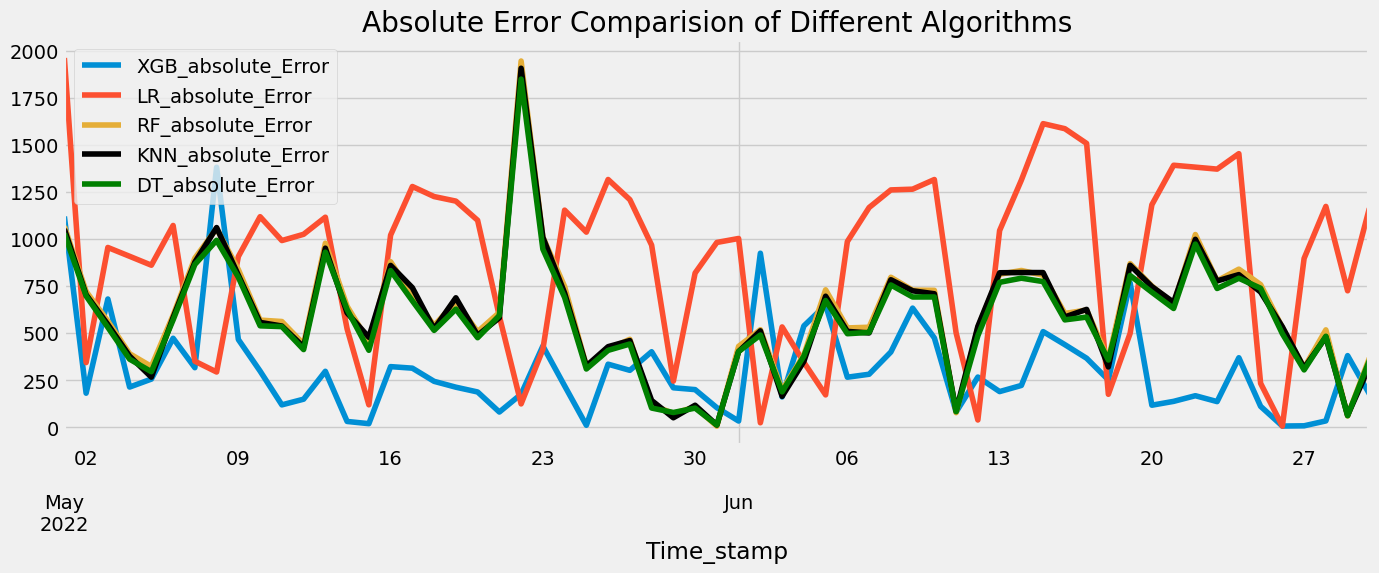

In [197]:
ax=results[['XGB_absolute_Error','LR_absolute_Error','RF_absolute_Error']].plot(figsize=(20,4))
results[["KNN_absolute_Error"]].mul(0.98).plot(ax=ax,color='black', figsize=(15,5))
results[["DT_absolute_Error"]].mul(0.95).plot(ax=ax,color='green', figsize=(15,5))
ax.set_title('Absolute Error Comparision of Different Algorithms')